Найти данные (по температуре отсюда https://datahub.io/core/global-temp#resource-annual) Извержения в России (https://volcano.si.edu/database/search_eruption_results.cfm) подтвержденные извержения с voi больше или равно 4 и начиная с 1880 года
Построить график  
Написать функцию  


In [144]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [145]:
df_temp = pd.read_csv('annual_temp.csv')
df_eruptions = pd.read_excel('eruptions.xlsx')

In [146]:
df_temp['Year'] = pd.to_datetime(df_temp['Year'], format='%Y')
df_temp.dropna(inplace=True)
df_temp = df_temp.groupby('Year').mean()
df_temp['Year'] = df_temp.index
print(df_temp.info())

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 137 entries, 1880-01-01 to 2016-01-01
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   Mean    137 non-null    float64       
 1   Year    137 non-null    datetime64[ns]
dtypes: datetime64[ns](1), float64(1)
memory usage: 3.2 KB
None


In [147]:
df_eruptions = df_eruptions[['Volcano Name', 'VEI', 'Start Year', 'Start Month', 'Start Day', 'End Year', 
                              'End Month', 'End Day']]
df_eruptions.dropna(inplace=True)
df_eruptions = df_eruptions[(df_eruptions['VEI'] >=4) & (df_eruptions['Start Year'] >=1880)]
df_eruptions[['Start Year', 'Start Month', 'Start Day', 
               'End Year', 'End Month', 'End Day']] = df_eruptions[['Start Year', 'Start Month', 'Start Day', 'End Year', 'End Month', 'End Day']].astype(str)
df_eruptions['start_date'] = pd.to_datetime(df_eruptions['Start Year'] + '/' 
                                            + df_eruptions['Start Month'] + '/' + df_eruptions['Start Day'], format='%Y/%m.0/%d.0' )
df_eruptions['end_date'] = pd.to_datetime(df_eruptions['End Year'] + '/' 
                                            + df_eruptions['End Month'] + '/' + df_eruptions['End Day'], format='%Y.0/%m.0/%d.0' )
print(df_eruptions)

      Volcano Name  VEI Start Year Start Month Start Day End Year End Month  \
47   Sarychev Peak  4.0       2009         6.0      11.0   2009.0       7.0   
81       Sheveluch  4.0       1999         8.0      15.0   2022.0      12.0   
116   Klyuchevskoy  4.0       1986        11.0      27.0   1990.0       9.0   
117    Chikurachki  4.0       1986        11.0      18.0   1986.0      12.0   
137          Alaid  4.0       1981         4.0      27.0   1981.0       6.0   
152      Tolbachik  4.0       1975         6.0      28.0   1976.0      12.0   
184      Sheveluch  4.0       1964        11.0      12.0   1964.0      11.0   
226     Bezymianny  5.0       1955        10.0      22.0   1957.0       3.0   
247  Sarychev Peak  4.0       1946        11.0       9.0   1946.0      11.0   
256     Avachinsky  4.0       1945         2.0      25.0   1945.0       2.0   
278    Kharimkotan  5.0       1933         1.0       8.0   1933.0       4.0   
284   Klyuchevskoy  4.0       1931         3.0      

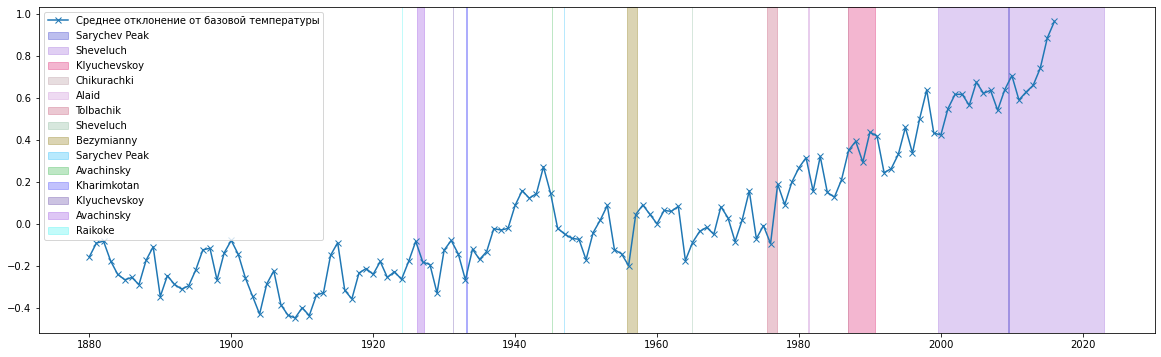

In [148]:
fig, ax = plt.subplots(figsize=(20, 6)) # задаем сабплот и размеры графика
ax.plot(df_temp['Year'], df_temp['Mean'], marker='x',label='Среднее отклонение от базовой температуры')
eruption_started = df_eruptions['start_date'].to_list()
eruption_ended = df_eruptions['end_date'].to_list()
for i in range(len(eruption_started)):
    ax.axvspan(eruption_started[i], eruption_ended[i], alpha=0.3, color=np.random.rand(3,), label=df_eruptions['Volcano Name'].to_list()[i] )
plt.legend()
plt.show()

In [168]:
def highlighted_date (x, y, label, x_2, y_2, label_2):
    fig, ax = plt.subplots(figsize=(12, 7)) # задаём параметры графика
    ax.plot(x, y, marker='x', label=label) # строим график целевого значения
    x_2 = x_2.to_list()
    y_2 = y_2.to_list()
    color_dict = {}
    already_labeled = []
    for j in label_2.unique(): # создаём словарь цветов для уникальных названий
        color_dict[j] = np.random.rand(3,) # цвета задаются рандомом
    label_2 = label_2.to_list()
    for i in range(len(x_2)):
        if(label_2[i] in already_labeled):
                ax.axvspan(x_2[i], y_2[i], alpha=0.3, color=color_dict[label_2[i]])
        else:
            ax.axvspan(x_2[i], y_2[i], alpha=0.3, color=color_dict[label_2[i]], label=label_2[i])
            already_labeled.append(label_2[i])
    plt.legend()
    plt.show()

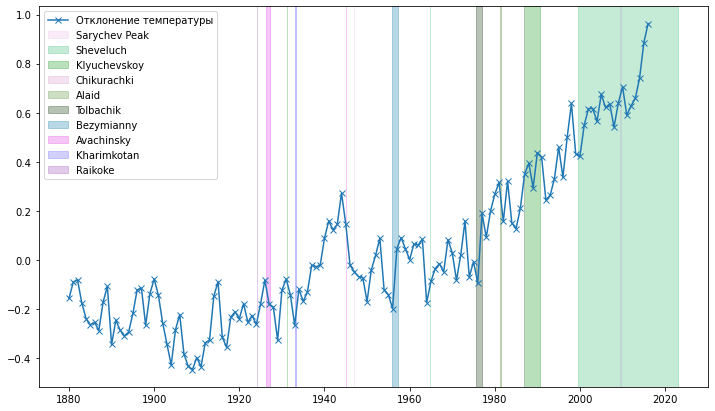

In [169]:
highlighted_date(df_temp['Year'], df_temp['Mean'], 
                 'Отклонение температуры',
                 df_eruptions['start_date'], df_eruptions['end_date'], 
                 df_eruptions['Volcano Name'])
